In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso



In [42]:
data = pd.read_csv("Survey Final Project V2.csv")

In [4]:
data.head()

,Sample Name,Household connected to the national grid?,have got an electric/pre-paid meter?,Monthly Electyricity Bill(Dollars),Monthly Electricity Consumption(KWh),Is the quality of electricity service the same all year?,Hours of electricity availability (in 24 hours),Hours of electricity availability (During Evening),No of Disruptions per week,Avg time of disruption( in minutes),...,Any Past accidents,Any Future Threats,Tier wrt Capacity,Tier wrt Availability,Tier wrt Reliability,Tier wrt Quality,Tier wrt Affordability,Tier wrt Legality,Tier wrt Health & Safety,FINAL TIER
0,Osvaldo Mcgary,0,0,0.0,0.000000,1.0,22,5,7,23,...,0,0,0,4,4,5,2,3,5,0
1,Carola Claudio,0,0,40.0,133.333333,1.0,20,1,29,17,...,0,0,5,1,3,5,5,3,5,1
2,Britteny Gregg,0,0,0.0,0.000000,0.0,19,4,13,23,...,0,1,0,4,4,5,2,3,3,0
3,Twila Tancredi,0,0,0.0,0.000000,1.0,12,7,28,16,...,0,1,0,3,3,5,2,3,3,0
4,Kasey Ryans,1,1,57.0,190.000000,1.0,5,7,23,16,...,0,0,5,2,3,3,5,5,5,2


In [9]:
data.describe()

,Household connected to the national grid?,have got an electric/pre-paid meter?,Monthly Electyricity Bill(Dollars),Monthly Electricity Consumption(KWh),Is the quality of electricity service the same all year?,Hours of electricity availability (in 24 hours),Hours of electricity availability (During Evening),No of Disruptions per week,Avg time of disruption( in minutes),Have Voltage Fluctions?,...,Any Past accidents,Any Future Threats,Tier wrt Capacity,Tier wrt Availability,Tier wrt Reliability,Tier wrt Quality,Tier wrt Affordability,Tier wrt Legality,Tier wrt Health & Safety,FINAL TIER
count,400.000000,400.00000,400.000000,400.000000,40.000000,400.000000,400.000000,400.00000,400.00000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000
mean,0.527500,0.77000,53.471500,178.238333,0.600000,12.440000,3.632500,15.27750,19.51000,0.352500,...,0.257500,0.452500,3.337500,2.130000,3.537500,4.295000,3.78500,4.055000,3.815000,1.297500
std,0.499868,0.42136,66.268797,220.895990,0.496139,7.290355,2.372027,8.45839,6.81697,0.478347,...,0.437805,0.498362,2.083133,1.571392,0.636086,0.956694,1.47452,0.999737,0.983969,1.244132
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.000000,3.000000,2.00000,3.000000,3.000000,0.000000
25%,0.000000,1.00000,0.150000,0.500000,0.000000,6.000000,2.000000,8.00000,14.00000,0.000000,...,0.000000,0.000000,0.750000,0.000000,3.000000,3.000000,2.00000,3.000000,3.000000,0.000000
50%,1.000000,1.00000,29.700000,99.000000,1.000000,13.000000,4.000000,15.00000,20.00000,0.000000,...,0.000000,0.000000,4.500000,2.000000,3.000000,5.000000,5.00000,5.000000,3.000000,2.000000
75%,1.000000,1.00000,88.275000,294.250000,1.000000,19.000000,6.000000,23.00000,25.00000,1.000000,...,1.000000,1.000000,5.000000,3.000000,4.000000,5.000000,5.00000,5.000000,5.000000,2.000000
max,1.000000,1.00000,392.000000,1306.666667,1.000000,24.000000,7.000000,30.00000,30.00000,1.000000,...,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,4.000000


Scatter Diagrams

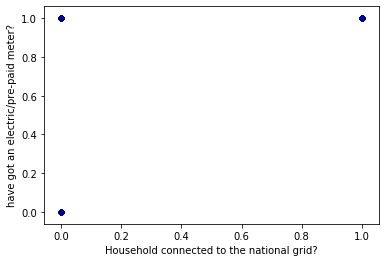

In [5]:
ax1 = data.plot.scatter(x='Household connected to the national grid?',
                      y='have got an electric/pre-paid meter?',
                      c='DarkBlue')

Here the Chart shows that all the Household Connected to the national grid(x axis value=1) has got ab electricity meter, whereas the households that are not connected to the national grid may or may not have an electricity meter. 

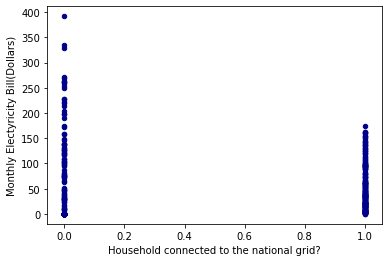

In [6]:
ax1 = data.plot.scatter(x='Household connected to the national grid?',
                      y='Monthly Electyricity Bill(Dollars)',
                      c='DarkBlue')

The chart shows that households that are connected to the national grid(x axis value=1) pays less electriciy bill whereas households not connected to the national grid pays more. From this we can conclude that the private entities that supplies charge more for such usages.

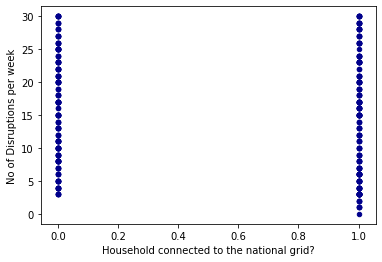

In [8]:
ax1 = data.plot.scatter(x='Household connected to the national grid?',
                      y='No of Disruptions per week',
                      c='DarkBlue')

The above chart shows that there is atleast 3 disrutption per week in households that are not connected to the grid whereas households that are connected to the grid can have even 0 disruptions per week

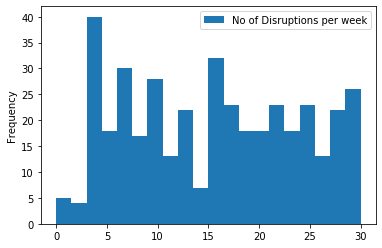

In [12]:
data.plot.hist(x='Household connected to the national grid?',
                      y='No of Disruptions per week',
                      bins=20)

In the graph, as we move towards the right, frequency of households increase and maximum households has a disruption between15 and 25. The no of households with hightest no of disruptions per week fals in the range 4 to 5( implies the no of such households are less as they are in the left of the graph)

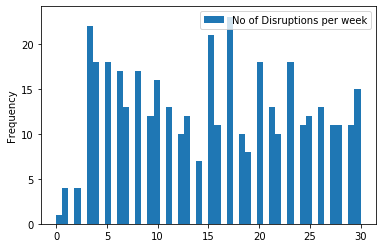

In [15]:
data.plot.hist(x='Monthly Electyricity Bill(Dollars)',
                      y='No of Disruptions per week',
                      bins=50)

Households that pay very less have least disruptions
households that pay the hightest has disruption frequency between 10 and 15

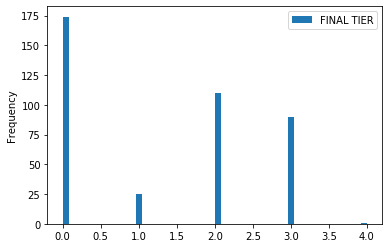

In [19]:
data.plot.hist(x='No of Disruptions per week',
                y='FINAL TIER',
               bins=50)

Tier 0  households haa 175 disruptions
Tier 1 has approx 25 disruptions
Tier 2 has 110 disruptions
Tier 3 has approx 87 disruptions
Tier 4 and Tier 5 has zero disruption


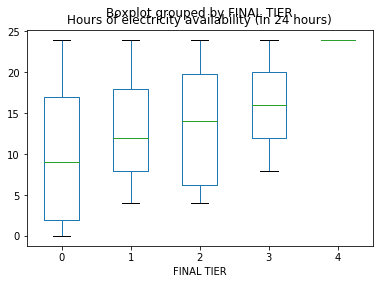

In [44]:
data.boxplot(by ='FINAL TIER', column =['Hours of electricity availability (in 24 hours)'], grid = False)

The Lower tiers have lower median and upper and lower values of electricity availability.

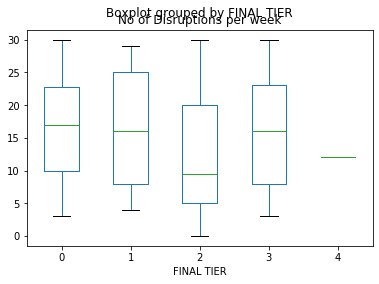

In [46]:
data.boxplot(by ='FINAL TIER', column =['No of Disruptions per week'], grid = False)

TIER 0 and Tier 1 has the highest no of disruptons. Tier 2 has lower no of disruptions than tier 3 which is an anomoly and unexpected scenerio in reallife scenario. Tier 4 and Tier 5 has no disruptions

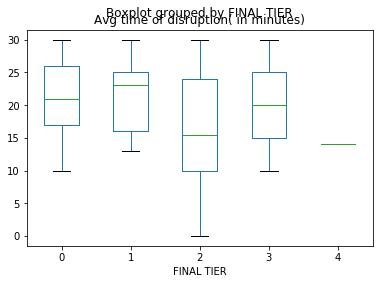

In [47]:
data.boxplot(by ='FINAL TIER', column =['Avg time of disruption( in minutes)'], grid = False)

Lower tiers has higher minutes of services getting disrupted. As the tier value increases the median value of dirsruption decreases. Tier 5 has no disruptions

Pearson Corelation

In [49]:
corr = data.corr()

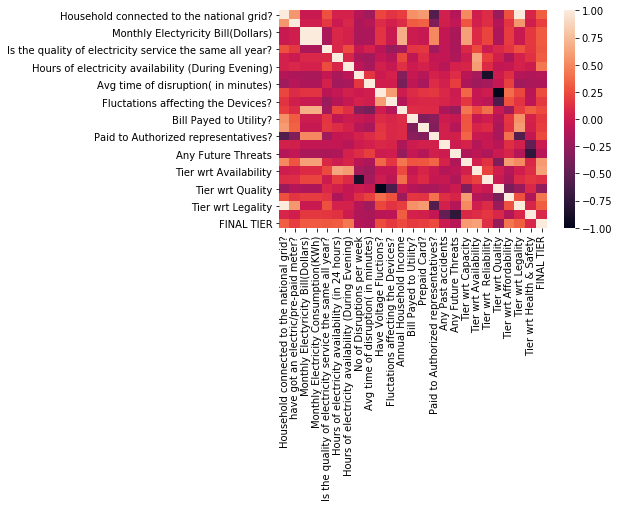

In [50]:
sns.heatmap(corr)

In [52]:
corr_target = abs(corr["FINAL TIER"])

In [53]:
relevant_features = corr_target[corr_target>0.5]
relevant_features

Tier wrt Capacity        0.586835
Tier wrt Availability    0.619869
FINAL TIER               1.000000
Name: FINAL TIER, dtype: float64

The feature selection with pearson correlation shows that the Capacity and Availability are the most critical parameters.

K- Means Featuring